<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_10_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%94%8C%EB%A1%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.10. 여러가지 시각화 플롯

---

* 날짜: 2022-04-21
* 이름: 박태현


## 등치지도

In [ ]:
import folium as fo

# json 파일이 있을 경우 불러올 수 있음
m = fo.Map( [37.566, 126.9780],
           zoom_start = 10, # 줌의 시작 정도 지정
           tiles = 'Stamen Toner' # 지도의 타일 스타일
           )
m

## 워드 클라우드

리스트안의 단어 빈도수를 크기를 통해 보여주는 차트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
text = [temp.split()[0] for temp in df['name']]
text = " ".join(text)

text[:50]

'chevrolet buick plymouth amc ford ford chevrolet p'

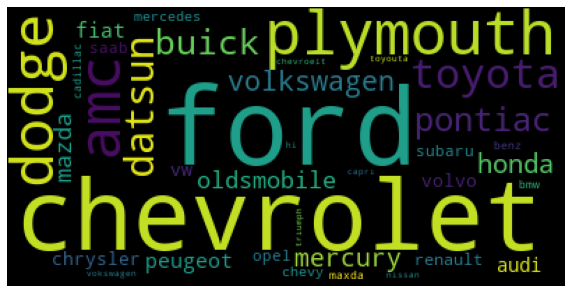

In [ ]:
word_cloud = WordCloud(collocations= False,
                       background_color='black').generate(text)

plt.figure(figsize = (10,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## 도넛

전체적인 비율을 보는데 적합한 차트

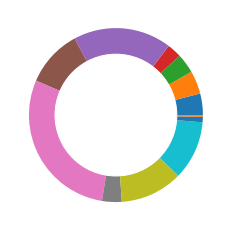

In [ ]:
donut = [12,13,11,8,55,32,87,11,35,33,3,1]
plt.pie(donut, radius = 1.0, )

incir = plt.Circle( (0,0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(incir,)

plt.show()

## 박스플롯

데이터의 대략적인 분포와 개별적인 이상치들을 보여주며 데이터 뭉치를 쉽게 비교

In [ ]:
import numpy as np

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 15



In [ ]:
# 사용할 데이터들을 랜덤값으로 바인딩

np.random.seed(0)
data_a = np.random.normal(0.2, 0.5, 1000)
data_b = np.random.normal(3.0, 1.5, 1000)
data_c = np.random.normal(1.2, 1.5, 1000)

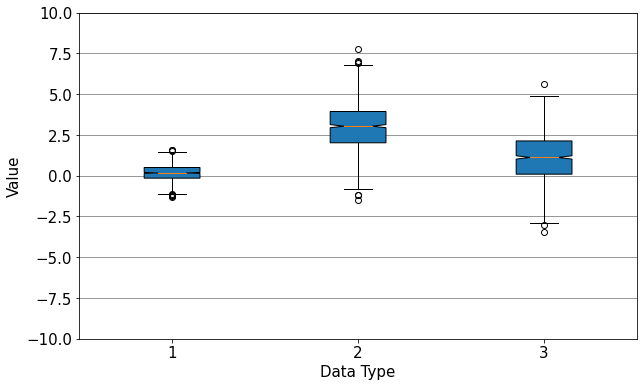

In [ ]:
fig, ax = plt.subplots()
bp = ax.boxplot([data_a, data_b, data_c],
                notch = True,
                patch_artist = True,
                )

ax.set_ylim(-10.0 , 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.grid(color = 'gray', linestyle = '-', 
         axis = 'y', )
plt.show()

## 네트워크 다이어그램

상호연관성을 확인할 때 사용.

노드 - 하나의 독립체

엣지(링크) - 노드간의 연결

In [ ]:
!pip install 

In [ ]:
import pandas as pd
import networkx as nx


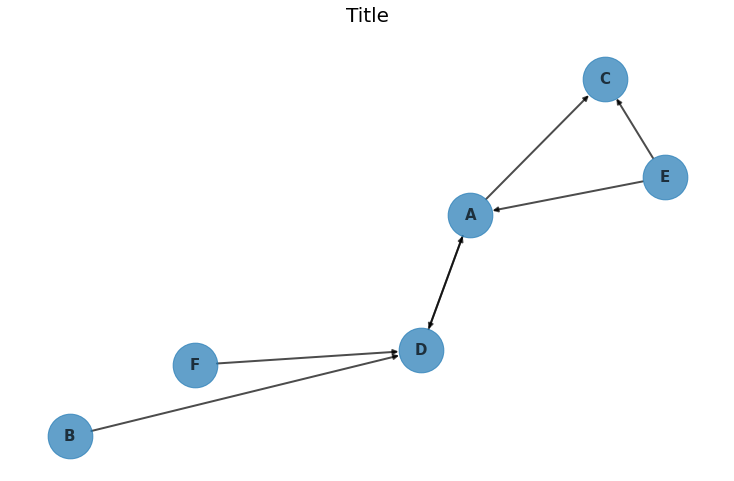

In [ ]:
df = pd.DataFrame( {'from' : ['D','A','B','E','A','E','F'],
                    'to' : ['A','D','D','C','C','A','D']} )
G = nx.from_pandas_edgelist(df, 'from', 'to', 
                            create_using = nx.DiGraph())# DiGraph 는 화살표를 나타 낼 수 있음

nx.draw(G,
        with_labels = True,
        node_size = 2000,
        alpha = .7,
        width = 2,
        arrows = True,
        font_size = 15,
        font_weight = 'bold'
        )
plt.title('Title', size = 20, pad = 20)

plt.show()

##3차원 산점도


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

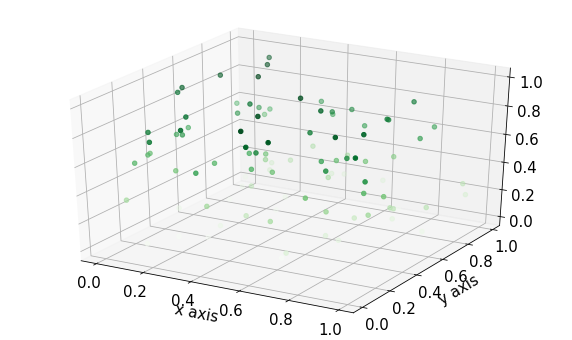

In [ ]:
np.random.seed(42)

xdata = np.random.rand(100)
ydata = np.random.rand(100)
zdata = np.random.rand(100)

ax = plt.axes(projection = '3d')
ax.scatter(xdata, ydata, zdata,
           c = zdata, 
           cmap = 'Greens'
           )
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.show()

## 생키 다이어그램
특정한 자료들의 흐름에 관한 정보를 시각화한 차트.

In [ ]:
import plotly.graph_objects as go

In [ ]:
source = [0,0,
          1,1,
          2,2]
target = [1,2,
          3,4,
          5,6]
value = [8.4, 3.0,
         7.2, 6.7,
         2.3, 5.1]

label = ['America App store spend', 
         'iPhone', 'iPad',
         'Phone Game', 'Phone Apps',
         'Pad Game', 'Pad Apps']

link = dict(source = source, target = target, value = value)
node = dict(label = label)

data = go.Sankey(link = link, node = node)

go.Figure(data)

## 버블맵
등치지도와는 달리 수치에 관한 자료를 지도에 마커화 시키는 차트.

지역,나라의 인구수 / 각 국가의 GDP / 인구,연령별 판매량 

In [ ]:
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude',
                  size = 'population',
                  mapbox_style = 'open-street-map',
                  size_max = 30,
                  )
